# Introduction to Machine Learning

What is Machine Learning?

Machine learning (ML) is the process to automatically extract knowledge from data, usually with the goal of making predictions on new, unseen data (a process also known as "generalization"). Another important aim of ML is to gain the ability to make decisions automatically from data, without the user specifying explicit rules how this decision should be made.


## Data representation
The data is presented to the algorithm usually as an array of numbers. Each data point (also known as sample) that we want to either learn from or make a decision on is represented as a list of numbers, called features, that reflect properties of this point.

## Types of ML

There are two main categories of machine learning: Supervised Learning and Unsupervised Learning


### Supervised Learning: Classification and regression

In Supervised Learning, we have a dataset consisting of both input features and a desired output (labels). The task is to construct a model (or program) which is able to predict the desired output (labels) of an unseen object given the set of features.

Supervised learning is further broken down into two categories, classification and regression. 

In classification, the label is discrete. In other words, it provides a clear-cut distinction between categories. In regression, the label is continuous, and the idea is to predict a quatitative information from the known features (countinuous output). 

In supervised learning, there is always a distinction between a training set for which the desired outcome is given, and a test set for which the desired outcome needs to be inferred and can be cross-checked.

### Unsupervised Learning

In Unsupervised Learning there is no desired output (or label) associated to the data. Instead, we are interested in extracting some form of knowledge or model from the given data. In a sense, one might think of unsupervised learning as a means of discovering labels from the data itself. 

Unsupervised learning comprises tasks such as dimensionality reduction, clustering, and density estimation. For example, unsupervised methods can be used to determine combinations of the measurements which best display the structure of the data. 



# Ipython Notebooks


* You can run a cell by pressing [shift] + [Enter] or by pressing the "play" button in the menu.
* You can get help on a function or object by pressing [shift] + [tab] after the opening parenthesis of a function()
* You can also get help by executing function?



## KNN: K-Nearest Neighbor Classification

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning)

Neighbors-based classification does not attempt to construct a general internal model, but simply stores the information from the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

A KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.

The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

The basic nearest neighbors classification uses uniform weights: that is, the value assigned to a query point is computed from a simple majority vote of the nearest neighbors. Under some circumstances, it is better to weight the neighbors such that nearer neighbors contribute more to the fit. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns uniform weights to each neighbor. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. 

The following examples taken from http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#example-neighbors-plot-classification-py show the general idea:

<img src="./plot_classification_001.png">

# Dataset for this DEMO

In the following exampe we will use a dataset containing information about the power generation from differnt type of plants based on renewable energy.

The task consist of predicting the plant type (say, WIND, SOLAR, WATER) from the information about the plant location (ZIP code or latitude and longitude) and  generated power in kW.

The data, plant type, its generated power, and its location (ZIP code) are stored, among other information in an MS Excel file, which we are going to load in the following.


In [1]:
# Load some standard Python libraries for data management and visualization

%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read data from the Excel file
data=pd.read_excel('./Direktvermarktung-Uebersicht_Jan_2016.xlsx',sheetname='DV-MPM')
# Show the data
data

,ÜNB,Netzbetreiber Betriebsnummer,Netzbetreiber Name,Anlagenschlüssel,Ort/Gemarkung,PLZ,Straße/Flurstück,Installierte Leistung in kW,Einspeisespannungsebene,Energietraeger,...,Mrz,Apr,Mai,Jun,Jul,Aug,Sep,Okt,Nov,Dez
0,Amprion,10001607.0,nvb Nordhorner Versorgungsbetriebe GmbH,E10843010000000000000027491500001,Itterbeck,49847,Strasse,190.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Amprion,10003764.0,WESTNETZ GmbH,E12974010000000000000028502300001,Twist,49767,Strasse,265.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Amprion,10001607.0,nvb Nordhorner Versorgungsbetriebe GmbH,E20793012000000000000020354720001,Laar,49824,Strasse,526.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Amprion,10003764.0,WESTNETZ GmbH,E21846010000000000001157876700001,Haren,49733,Strasse,250.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Amprion,10003764.0,WESTNETZ GmbH,E21846010000000000001157933000001,Haren,49733,Strasse,250.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Amprion,10003764.0,WESTNETZ GmbH,E218780100000E0000000005024800001,Recke,49509,Strasse,350.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Amprion,10000055.0,Elektrizitätswerk Hindelang eG,E30055018754104413050013992EEGW01,Hinterstein,87541,Strasse,530.00,MS,Wasserkraft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Amprion,10000055.0,Elektrizitätswerk Hindelang eG,E30055018754104413050013992EEGW02,Hinterstein,87541,Strasse,550.00,MS,Wasserkraft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Amprion,10000065.0,Strom- und Gasversorgung Versmold GmbH,E30065010000000000000000064600314,Versmold,33775,Strasse,560.00,MS,Biomasse,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Amprion,10000096.0,Stadtwerke Sulzbach/Saar GmbH,E30096015300000000000000023500179,Sulzbach,66280,Strasse,3542.40,MS,Solar,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Let us retrieve the information we are interested in:
info = ["PLZ", "Energietraeger","Installierte Leistung in kW"]
# print the first 10 data points
print data[info][0:10]

     PLZ Energietraeger  Installierte Leistung in kW
0  49847       Biomasse                        190.0
1  49767       Biomasse                        265.0
2  49824       Biomasse                        526.0
3  49733       Biomasse                        250.0
4  49733       Biomasse                        250.0
5  49509       Biomasse                        350.0
6  87541    Wasserkraft                        530.0
7  87541    Wasserkraft                        550.0
8  33775       Biomasse                        560.0
9  66280          Solar                       3542.4


The plant type "Energietraeger" is a string, and as is, it is not well suited for machine learning algorithms. Instead we will use it to produce integer data labels, referred to as "Energietraeger_enc". This information is added to the original data:

In [4]:
# encode Energietraeger to integer class labels:
from sklearn import preprocessing
encodeEnergietr = preprocessing.LabelEncoder()
data["Energietraeger_enc"]=encodeEnergietr.fit_transform(data["Energietraeger"])

In [5]:
info = ["PLZ", "Energietraeger","Energietraeger_enc","Installierte Leistung in kW"]
print data[info][0:10]

     PLZ Energietraeger  Energietraeger_enc  Installierte Leistung in kW
0  49847       Biomasse                   0                        190.0
1  49767       Biomasse                   0                        265.0
2  49824       Biomasse                   0                        526.0
3  49733       Biomasse                   0                        250.0
4  49733       Biomasse                   0                        250.0
5  49509       Biomasse                   0                        350.0
6  87541    Wasserkraft                   8                        530.0
7  87541    Wasserkraft                   8                        550.0
8  33775       Biomasse                   0                        560.0
9  66280          Solar                   6                       3542.4


## Setup ML algorithms

### Training set and testing set

As already mentioned, machine learning is about learning some properties of a data set and applying them to new data. This is why a common practice in machine learning to evaluate an algorithm is to split the data at hand into two sets, one that we call the "training set" on which we learn data properties and one that we call the "testing set" on which we test these properties, and evaluate the algorithm effectiveness.

As a first attempt let us use the produced power (X), and the plant labels (y).

Let us define train_X and train_y  the train data and labels, and test_X and test_y the correponding quantities for the test set.

In [6]:
from sklearn.cross_validation import train_test_split

variables = ["Installierte Leistung in kW"]
X=data[variables].values
y=data["Energietraeger_enc"]

# Split randomly the orginal data set in two parts:
# use the first half for training, 
# the second half for testing

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)

In the following we will:

* Load from the scikit-learn library the KNeighborsClassifier
* Train it based on the training set. 
* Use the information gained from the training set to predict the labels (plant type) in the test set.
* Evaluate the fraction of the correct label assignments in the test set, i.e. the fraction of cases in which the preduction equals the true labels in the test set. 

In [7]:
# Load from the scikit-learn library the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

# Train it based on the training set.
classifier.fit(train_X, train_y)

# Use the information gained from the training set to predict the labels (plant type) in the test set
pred_y = classifier.predict(test_X)

# Evaluate the fraction of the correct label assignments in the test set, 
# i.e. the fraction of cases in which the preduction equals the true labels in the test set
print("Fraction Correct label assignments")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct label assignments
0.672498767866


In [8]:
# Alternatively, this can be obtained also calling classifier.score:
print "test score  ", classifier.score(test_X, test_y)

test score   0.672498767866


### Complementing the orginal data with adding additional info

Let us see if we can improve the performance of the classification by using additional information. In the following we will read in an additional file containing the ZIP mapping into latitude and longitude

In [9]:
# read PLZ data:
plz=pd.read_csv("PLZ.tab", sep="\t")
plz["PLZ"]=plz["plz"]
# show the data
plz[0:10]

,#loc_id,plz,lon,lat,Ort,PLZ
0,5078,1067,13.721068,51.060034,Dresden,1067
1,5079,1069,13.738907,51.039559,Dresden,1069
2,5080,1097,13.743967,51.066745,Dresden,1097
3,5081,1099,13.828980,51.092619,Dresden,1099
4,153646,1108,13.828980,51.092619,Dresden,1108
5,5082,1109,13.761965,51.120101,Dresden,1109
6,5083,1127,13.733347,51.079630,Dresden,1127
7,5084,1129,13.727410,51.096794,Dresden,1129
8,5085,1139,13.691144,51.080557,Dresden,1139
9,5106,1156,13.623307,51.066631,Cossebaude,1156


Now add ("join") this information to our original data:

In [10]:
# join data with PLZ:
data2 = pd.merge(data, plz, how='left', on="PLZ").fillna(0.)

data2["Leistung"] = data2["Installierte Leistung in kW"]

info = ["PLZ", "lon", "lat","Energietraeger","Energietraeger_enc","Installierte Leistung in kW","Leistung"]

# show the obtained information from the firt 10 power plants:
data2[info][0:10]

,PLZ,lon,lat,Energietraeger,Energietraeger_enc,Installierte Leistung in kW,Leistung
0,49847,6.751713,52.515639,Biomasse,0,190.0,190.0
1,49767,7.095613,52.668487,Biomasse,0,265.0,265.0
2,49824,6.844740,52.615410,Biomasse,0,526.0,526.0
3,49733,7.199469,52.797957,Biomasse,0,250.0,250.0
4,49733,7.199469,52.797957,Biomasse,0,250.0,250.0
5,49509,7.704652,52.364821,Biomasse,0,350.0,350.0
6,87541,10.399859,47.472895,Wasserkraft,8,530.0,530.0
7,87541,10.399859,47.472895,Wasserkraft,8,550.0,550.0
8,33775,8.170358,52.040224,Biomasse,0,560.0,560.0
9,66280,7.075717,49.299080,Solar,6,3542.4,3542.4


Now use this additional information to re-train the KNN algorithm

In [11]:
# use lat/lon:
from sklearn.cross_validation import train_test_split
variables = ["Installierte Leistung in kW", "lat", "lon"]

X=data2[variables].values
y=data2["Energietraeger_enc"]
names = data2["Energietraeger"]

# recall mapping between Energietraeger and Energietraeger_enc:
ids = np.unique(y), 
lab = np.unique(names)
print ids
print lab

# Re-define the test and training sets.
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64),)
[u'Biomasse' u'Deponiegas' u'Gas' u'Geothermie' u'Grubengas' u'Kl\xe4rgas'
 u'Solar' u'Wasser' u'Wasserkraft' u'Wind' u'Wind offshore' u'Windenergie'
 u'Windenergie Offshore']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F3B7320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D5AB940>]], dtype=object)

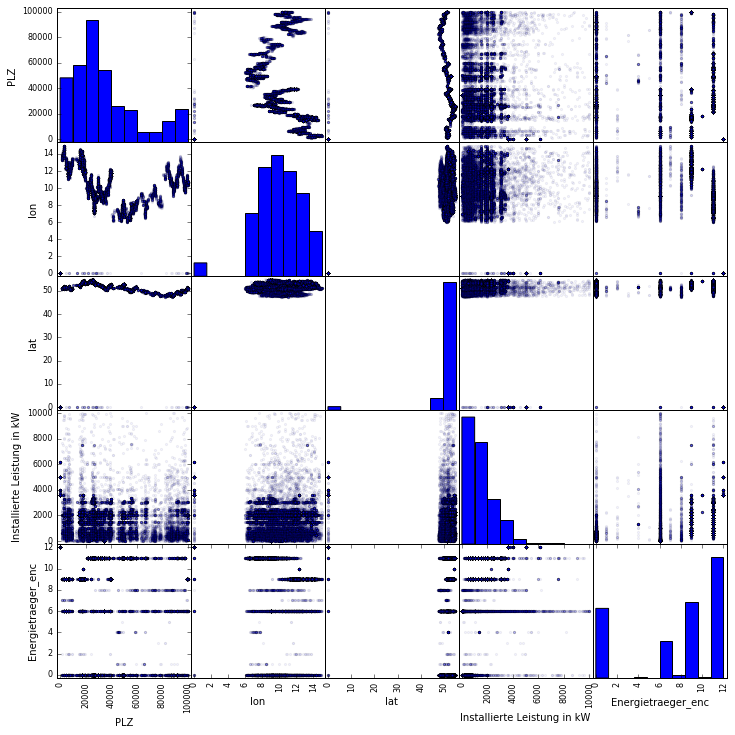

In [12]:
# Show the correlation between the inputs and the labels
info = ["PLZ","lon", "lat","Installierte Leistung in kW", "Energietraeger_enc"]
# For better visualization, select only events in which the Leistung is less than 10000 kW.
pd.scatter_matrix(data2[info][data2.Leistung<10000], alpha=0.05, figsize=(12, 12))

In [13]:
# re-train the KNN algorithm now using also Longitude and Latitude
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print("Fraction Correct Laberl assignments")
print(np.sum(pred_y == test_y) / float(len(test_y)))

Fraction Correct Laberl assignments
0.88442582553


(Recall: when using only the plant power, the fraction of correct label assignment was 0.67).

### Selecting a subset of power plants

Let us reduce the scope of the problem and only concentrate on a few power plant types.

Then produce and inspect the confusion matrix, which is a specific table layout that allows visualization of the performance of the ML algorithm. Each column of the matrix represents the instances in a predicted class while each row represents the instances in an actual class (or vice-versa). The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another).

In [14]:
print "Original list of power plant types:\n\n", pd.unique(data2.Energietraeger)

Original list of power plant types:

[u'Biomasse' u'Wasserkraft' u'Solar' u'Windenergie' u'Geothermie'
 u'Grubengas' u'Deponiegas' u'Kl\xe4rgas' u'Windenergie Offshore' u'Wind'
 u'Gas' u'Wasser' u'Wind offshore']


In [15]:
# Plant type          # number of entries #Index
#Biomasse             =  7389              id =  0
#Wasserkraft          =   316              id =  8  
#Solar                =  3887              id =  6
#Windenergie          = 12022              id = 11
#Geothermie           =     3              id =  3
#Gruebengas           =    64              id =  4
#Deponiertgas         =    37              id =  1
#Klaeregas            =     3              id =  5
#Windenergie Offshore =   688              id = 12
#Wind                 =  7973              id =  9
#Gas                  =    23              id =  2
#Wasser               =    58              id =  7
#Wind offshore        =   101              id = 10

In [16]:
# define a new datasets in which we only store information about the following
# power plant types: Biomasse, Solar and Windenergie
data3=data2.loc[data2['Energietraeger'].isin(['Biomasse','Solar','Windenergie'])]

print "Reduced list of power plant types:\n\n", pd.unique(data3.Energietraeger)

Reduced list of power plant types:

[u'Biomasse' u'Solar' u'Windenergie']


In [17]:
variables = ["Installierte Leistung in kW", "lat", "lon"]
X=data3[variables].values
y=data3["Energietraeger_enc"]
names = data3["Energietraeger"]
ids = np.unique(y), 
lab = np.unique(names)
print ids, lab
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()

classifier.fit(train_X, train_y)
pred_y = classifier.predict(test_X)

print "test score  ", classifier.score(test_X, test_y)


(array([ 0,  6, 11], dtype=int64),) [u'Biomasse' u'Solar' u'Windenergie']
test score   0.892145874644


Normalized confusion matrix


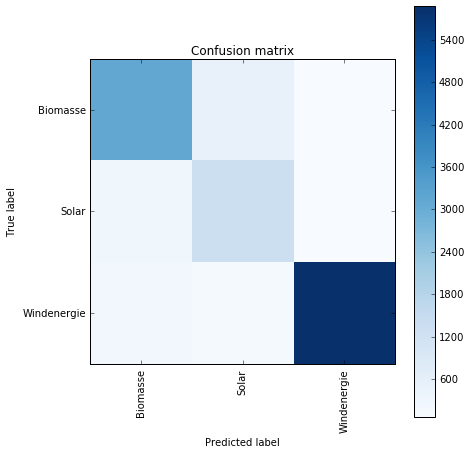

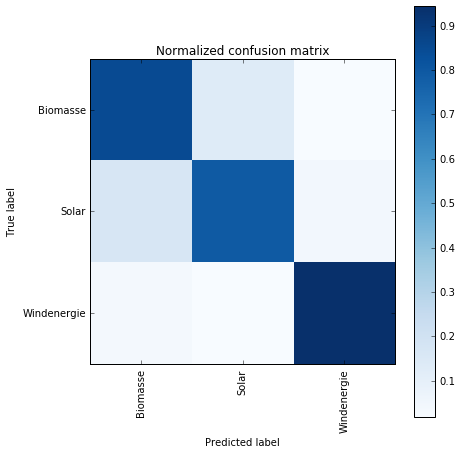

In [18]:
# function to plot the confusion matrix
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# test how well the prediction worked.
from sklearn.metrics import confusion_matrix


cm =confusion_matrix(pred_y, test_y)
#print (cm)
plot_confusion_matrix(cm)
tick_marks = np.arange(len(lab))
plt.xticks(tick_marks, lab, rotation=90)
plt.yticks(tick_marks, lab)
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
tick_marks = np.arange(len(lab))
plt.xticks(tick_marks, lab, rotation=90)
plt.yticks(tick_marks, lab)

plt.show()


## What happens changing the KNN parameters?

### Reminder:

#### KNN number of neighbohrs (k)

The KNN classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
A KNeighborsClassifier implements learning based on the k nearest neighbors of each query point, where k is an integer value specified by the user.
The optimal choice of the value k is highly data-dependent: in general a larger k suppresses the effects of noise, but makes the classification boundaries less distinct.

#### KNN weights:

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, weights = 'uniform', assigns equal weights to all points. weights = 'distance' assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

In [19]:
# What are the parameters of the KNN model we used?
print classifier.get_params


<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')>


In [20]:
# Let us see what happens when changing the weights:

n_neighbors= 5
for weights in ['uniform', 'distance']:
    classifier = KNeighborsClassifier(n_neighbors, weights=weights)
    classifier.fit(train_X, train_y)
    pred_y = classifier.predict(test_X)
    print "KNN (weigths =", weights, ") test score  ", classifier.score(test_X, test_y)
    


KNN (weigths = uniform ) test score   0.892145874644
KNN (weigths = distance ) test score   0.902146736788


In [21]:
# and then by using different values of k:

weights = 'uniform'
for n_neighbors in range(1,11):
    classifier = KNeighborsClassifier(n_neighbors, weights=weights)
    classifier.fit(train_X, train_y)
    pred_y = classifier.predict(test_X)
    print "KNN (k =", n_neighbors, ") test score  ", classifier.score(test_X, test_y)

KNN (k = 1 ) test score   0.90197430813
KNN (k = 2 ) test score   0.889990516424
KNN (k = 3 ) test score   0.893094232261
KNN (k = 4 ) test score   0.892404517631
KNN (k = 5 ) test score   0.892145874644
KNN (k = 6 ) test score   0.888180015519
KNN (k = 7 ) test score   0.88585222864
KNN (k = 8 ) test score   0.885938442969
KNN (k = 9 ) test score   0.884645228037
KNN (k = 10 ) test score   0.882058798172


### Decision boundaries visualization

In the following we will visualize the decision boundaries of our KNN algorithm. 
To do so in a easier way, let us train our model using only two variables: the gererated power of the plant and the ZIP code.

KNN (k = 1 ) test score   0.873696008277


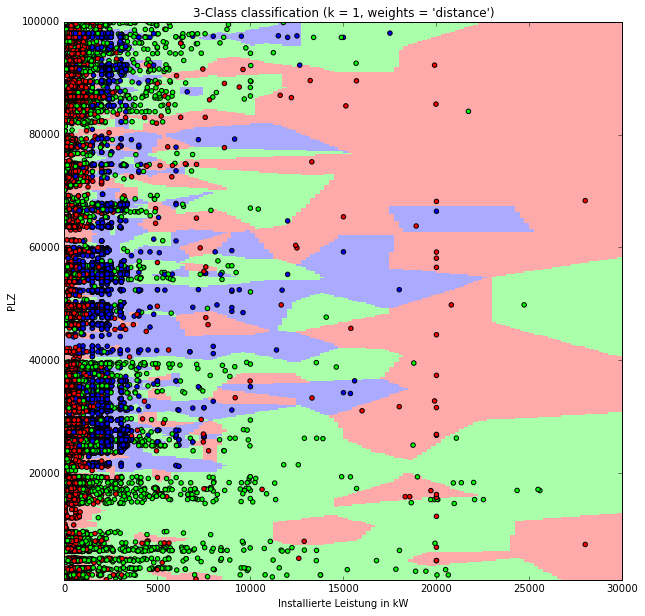

KNN (k = 5 ) test score   0.882748512803


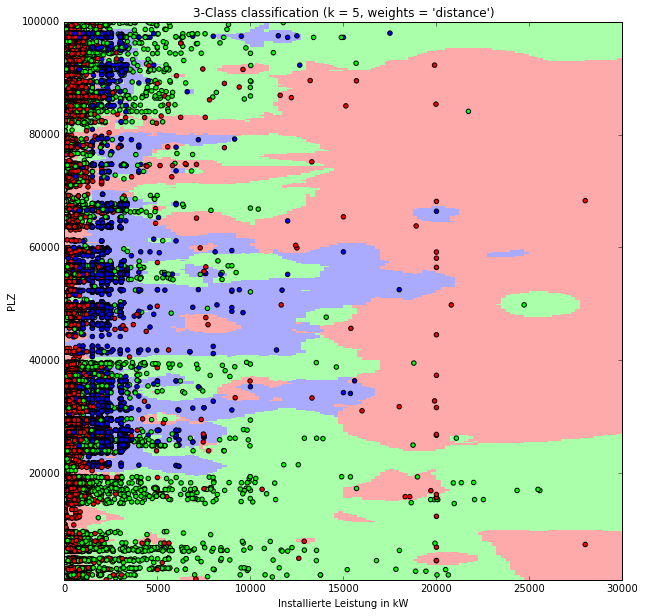

In [27]:
# Setup a grid for the decision boundaries visualization

from matplotlib.colors import ListedColormap
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# set the min/max dimension of the grid
x_min, x_max = X[:, 0].min() -1, 30000+1
y_min, y_max = X[:, 1].min() -1, X[:, 1].max() + 1

hx = 250  # step size for the grid
hy = 250
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Let us simplify our KNN model: use only two dimensions:
# the plant power and the ZIP code:

variables = ["Installierte Leistung in kW", "PLZ"]
X=data3[variables].values
y=data3["Energietraeger_enc"]

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)

from sklearn.neighbors import KNeighborsClassifier

# see how the decision boundaries look like for k=1 and k=5 
# (for both cases let us use the 'distance' weights)
weights = 'distance'

for n_neighbors in [1,5]:

    classifier = KNeighborsClassifier(n_neighbors,weights=weights)

    classifier.fit(train_X, train_y)
    pred_y = classifier.predict(test_X)
    print "KNN (k =", n_neighbors, ") test score  ", classifier.score(test_X, test_y)
    # Predict the labels based on the points of the grid:
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
 
    plt.figure(figsize=(10,10))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.ylabel('PLZ')
    plt.xlabel('Installierte Leistung in kW')

    plt.show()

    

## What about changing ML algorithm? 

## Support vector machines in a nutshell

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

<img src="./plot_separating_hyperplane_0011.png">

### Kernels:

Different kernel can be used to modify the hyperplanes:
The kernel function can be any of the following:

* linear
* polynomial (need to specify the polynomial degree.
* radial basis functions (rbf)

#### Parameter of the Radial Basis Function kernel
The "gamma" parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’. The gamma parameters can be seen as the inverse of the radius of influence of samples selected by the model as support vectors.

The "C" parameter trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly by giving the model freedom to select more samples as support vectors.


In [23]:
# In the following piece of code the way Support Vector Machines can be used is illustrated.
# A exercise try to change the parameters C and/or gamma (for example set gamma to 1, 2, or 5) 
# and monitor the changes of the decision boundaries

SVC test score   0.750668161048


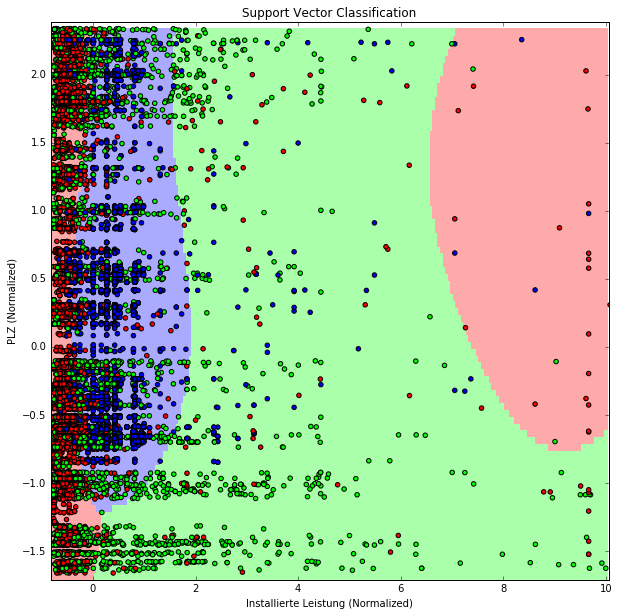

Normalized confusion matrix
[[ 0.85463659  0.10888332  0.03648009]
 [ 0.1500615   0.82103321  0.02890529]
 [ 0.04873081  0.036979    0.91429019]]


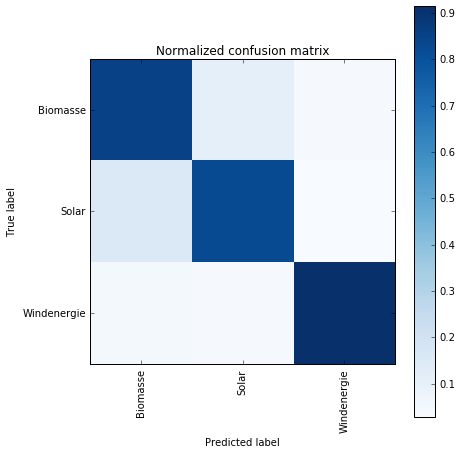

In [24]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

variables = ["Installierte Leistung in kW", "PLZ"]
X=data3[variables].values
y=data3["Energietraeger_enc"]


# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X = scaler.fit_transform(X)

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=1999)

classifier = SVC(kernel='rbf',C=1, gamma=0.1)
classifier.fit(train_X,train_y)

#pred_y = classifier.predict(test_X)

print "SVC test score  ", classifier.score(test_X, test_y)

# Draw decision boundaries

hx = 0.05  # step size for the grid
hy = 0.05

# set the min/max dimension of the grid
x_min, x_max = X[:, 0].min()-hx , 10+hx
y_min, y_max = X[:, 1].min()-hy , X[:, 1].max()+hy


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(10,10))
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)

plt.title("Support Vector Classification")
plt.ylabel('PLZ (Normalized)')
plt.xlabel('Installierte Leistung (Normalized)')
plt.show()

# Show the corresponding normalized confusion matrix
cm =confusion_matrix(pred_y, test_y)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')
tick_marks = np.arange(len(lab))
plt.xticks(tick_marks, lab, rotation=90)
plt.yticks(tick_marks, lab)

plt.show()



In [25]:
# Optimize SVM parameters (note takes quite some time)
# run only if wanted, if so set optimizeSVCpar to True

optimizeSVCpar = False

if (optimizeSVCpar):

    from sklearn.grid_search import GridSearchCV

    C_range = np.logspace(-1, 3, 5)
    gamma_range = np.logspace(-1, 3, 5)
    param_grid = dict(gamma=gamma_range, C=C_range)
    print "We will test the model against the following parameters\n"
    print param_grid
    print "This will take some time, please be patient."
    
    grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid)
    grid.fit(train_X, train_y)

    print("The best parameters are %s with a score of %0.2f"
          % (grid.best_params_, grid.best_score_))